In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

citydata = pd.read_csv("C:/Users/sethn/Desktop/MatplotHW/city_data.csv")
ridedata = pd.read_csv("C:/Users/sethn/Desktop/MatplotHW/ride_data.csv")
citydata.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ridedata.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
fulldata = ridedata.merge(citydata, left_on="city", right_on="city", how="outer")
fulldata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# Groupby to get by city data
# nodupes table used to vlookup to summary table


citygroup = fulldata.groupby("city")
avgfare = citygroup["fare"].mean()
ttlrides = citygroup["ride_id"].count()

summary = pd.DataFrame({"total_rides": ttlrides,
                         "avg_fare": avgfare})

nodupes = fulldata[["city", "driver_count", 'type']].drop_duplicates().set_index("city")
nodupes

plotsummary = pd.merge(summary, nodupes, left_index=True, right_index=True)


plotsummary.head()



,total_rides,avg_fare,driver_count,type
city,,,,
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [5]:
Urban = plotsummary[plotsummary["type"] == "Urban"]
Suburban = plotsummary[plotsummary["type"] == "Suburban"]
Rural = plotsummary[plotsummary["type"] == "Rural"]

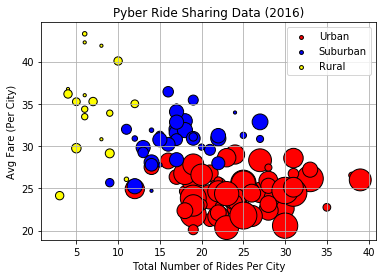

In [6]:
Urbans = list(Urban["driver_count"]*10)
Suburbans = list(Suburban["driver_count"]*10)
Rurals = list(Rural["driver_count"]*10)

ax1 = Urban.plot(kind="scatter", x="total_rides", y="avg_fare", 
                 color="red", label="Urban", edgecolors="black", s=Urbans, grid=True)
Suburban.plot(kind="scatter", x="total_rides", y="avg_fare", 
                    color="blue", label="Suburban", grid=True, edgecolors="black", s=Suburbans, ax=ax1)
Rural.plot(kind="scatter", x="total_rides", y="avg_fare", 
                 color="yellow", label="Rural", grid=True, edgecolors="black", s=Rurals, ax=ax1)

plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Avg Fare (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")

lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for i in lgnd.legendHandles:
    i.set_sizes([15.0])

    
plt.savefig("Scatter.png")

In [7]:
typegroup = fulldata.groupby("type")
typegroupnodupes = nodupes.groupby("type")

faresum = typegroup["fare"].sum()
ttlrides = typegroup["ride_id"].count()
ttldrivers = typegroupnodupes["driver_count"].sum()


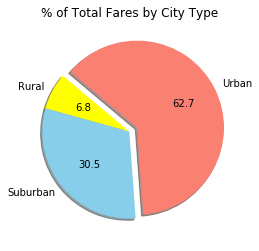

<Figure size 432x288 with 0 Axes>

In [8]:
explode = (0, 0, 0.1)
colors = ("yellow", "skyblue", "salmon")

faresum.plot(kind="pie", autopct='%.1f', explode=explode, colors=colors, startangle=140, shadow=True)
plt.title("% of Total Fares by City Type")
plt.ylabel("")


plt.show()
plt.savefig("Fare.png")

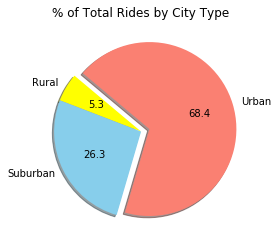

<Figure size 432x288 with 0 Axes>

In [9]:
explode = (0, 0, 0.1)
colors = ("yellow", "skyblue", "salmon")

ttlrides.plot(kind="pie", autopct='%.1f', explode=explode, colors=colors, startangle=140, shadow=True)
plt.title("% of Total Rides by City Type")
plt.ylabel("")


plt.show()
plt.savefig("Rides.png")

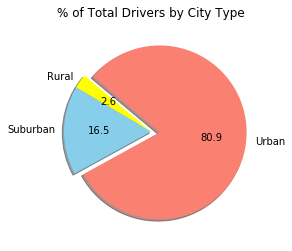

<Figure size 432x288 with 0 Axes>

In [10]:
explode = (0, 0, 0.1)
colors = ("yellow", "skyblue", "salmon")

ttldrivers.plot(kind="pie", autopct='%.1f', explode=explode, colors=colors, startangle=140, shadow=True)
plt.title("% of Total Drivers by City Type")
plt.ylabel("")


plt.show()
plt.savefig("Drivers.png")